# OSMI 2014-2019 (EDA project)

In [94]:
# import libreries
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set_palette('Set2')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [95]:
# import data
osmi14 = pd.read_csv('2014-Mental-Health-in-Tech.csv')
osmi14.shape

(1259, 27)

In [96]:
osmi16 = pd.read_csv('2016-Mental-Health-in-Tech.csv')
osmi16.shape

(1433, 63)

In [97]:
osmi19 = pd.read_csv('2019-Mental-Health-in-Tech.csv')
osmi19.shape

(352, 82)

In [98]:
# compare columns os each year survey
print(osmi14.columns)
print(osmi16.columns)
print(osmi19.columns)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental 

## DATA WRANGLING

I decided to keep just employers from USA as techworkers' representation. In 2014 that was the country with more tech public companies in the world (TIC).

In [99]:
osmi14 = osmi14.loc[(osmi14['Country'] == 'United States')]
osmi14.shape

(751, 27)

In [100]:
osmi16 = osmi16.loc[osmi16['What country do you live in?'] == 'United States of America']
osmi16.shape

(840, 63)

In [101]:
# in this survey there are so many less entries than the others, so I decided to get tech workers of all nationalities, willing that 2020 survey will have more entries to complete the study in the line that I defined at first. Everyone go to https://osmihelp.org/research ^^
osmi19['What country do you *live* in?'].value_counts()

United States of America    204
United Kingdom               32
Portugal                     18
Brazil                       17
Canada                       15
India                        13
Norway                        5
Netherlands                   4
Switzerland                   4
Germany                       4
Poland                        3
Turkey                        3
Spain                         3
Belgium                       2
South Africa                  2
Pakistan                      2
New Zealand                   2
Estonia                       2
Ireland                       2
Italy                         2
Mexico                        2
Ghana                         1
Indonesia                     1
France                        1
Hong Kong                     1
Greece                        1
Croatia                       1
Algeria                       1
Austria                       1
Afghanistan                   1
Japan                         1
Israel  

Gender column has no default answers, so I create labels to get to use this feature easily.

In [102]:
osmi14.Gender.value_counts()

Male                348
M                    92
male                 90
Female               82
female               43
F                    34
m                    18
f                    11
Make                  4
Cis Male              2
Female (trans)        2
Female                2
Woman                 2
msle                  1
cis male              1
non-binary            1
Trans woman           1
Male (CIS)            1
Genderqueer           1
maile                 1
Nah                   1
Male-ish              1
queer/she/they        1
Man                   1
woman                 1
Trans-female          1
p                     1
Cis Female            1
cis-female/femme      1
Mail                  1
femail                1
Male                  1
Female (cis)          1
Femake                1
Name: Gender, dtype: int64

In [103]:
# 2014
def f(x): 
    # answers to group in their correspondent label
    r1 = re.compile('Male|male|m|M|Make|Cis Male|Male-ish|Male (CIS)|Man|Male |msle|cis male|Mail')
    r2 = re.compile('Female|female|F|f|Woman|Female (trans)|Female |femail|Trans-female|Cis Female|cis-female/femme|woman|Trans woman|Femake|Female (cis)')
    r3 = re.compile('non-binary|queer/she/they|Genderqueer')
    if r1.match(x):
        return 'Male'
    elif r2.match(x):
        return 'Female'
    elif r3.match(x):
        return 'Genderqueer-Other'
    else:
        return 'NaN'

osmi14['Gender'] = osmi14['Gender'].apply(f)
print(len(osmi14['Gender']))

# replace the 2 nulls with Male, the mode gender, so we don't have to drop the row
nan_value = float("NaN")

osmi14.replace("NaN", nan_value, inplace=True)

osmi14['Gender'] = osmi14['Gender'].replace(np.NaN, 'Male')
osmi14['Gender'].unique()

751


array(['Female', 'Male', 'Genderqueer-Other'], dtype=object)

In [104]:
# 2016
# answers to group in their correspondent label
osmi16['What is your gender?'] = osmi16['What is your gender?'].replace([
    'male', 'Male ', 'M', 'm', 'Man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Dude','mail', 'male ', 'Cis Male', 
    'cisdude', 'cis man', 'MALE', 'msle'], 'Male')
   
osmi16['What is your gender?'] = osmi16['What is your gender?'].replace([
    'Female', 'female','F','f','Woman','woman','Female ',' Female', 'female ', 'Trans-female','Cis Female|cis-female/femme','woman','Trans woman','Femake','Female (cis)','female/woman','Female (props for making this a freeform field, though)','Cis-woman','fem','Cisgender Female','fm','AFAB','mtf'], 'Female')

 
osmi16['What is your gender?'] = osmi16['What is your gender?'].replace([
        'non-binary','genderqueer','Genderflux demi-girl','Male/genderqueer','Female or Multi-Gender Femme','Nonbinary', 'Genderqueer','genderqueer woman','Agender','Other','Genderfluid', 'Unicorn', 'Human', 'human'
    ], 'Genderqueer-Other')


# replace the one null with Male, the mode gender, so we don't have to drop the row
osmi16['What is your gender?'] = osmi16['What is your gender?'].replace(['none of your business'], 'Male')
print(osmi16['What is your gender?'].value_counts())
print(len(osmi16['What is your gender?']))

Male                 571
Female               252
Genderqueer-Other     15
Name: What is your gender?, dtype: int64
840


In [105]:
# 2019
# answers to group in their correspondent label
osmi19['What is your gender?'] = osmi19['What is your gender?'].replace([
    'male', 'Male ', 'M', 'm', 'Man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Dude', 'Identify as male','mail', 'male ', 'Cis Male', 
    'cisdude', 'cis man', 'MALE', 'msle', 'man', 'Let\'s keep it simple and say "male"', 'CIS Male', 'Cishet male', 'Trans man', 'I have a penis', 'Cis Male', 'Make', 'masculino', 'Masculine'], 'Male')
   
osmi19['What is your gender?'] = osmi19['What is your gender?'].replace([
    'Female', 'female','F','f', 'Female-identified','Woman','woman','Female ',' Female', 'female ', 'Trans-female','Cis Female|cis-female/femme','woman','Trans woman','Femake','Female (cis)','female/woman','Female (props for making this a freeform field, though)','Cis-woman','fem','Cisgender Female','fm','AFAB','mtf', 'cis woman', 'Femile', 'femmina'], 'Female')

 
osmi19['What is your gender?'] = osmi19['What is your gender?'].replace([
        'non-binary','genderqueer','I am a Wookie','Genderflux demi-girl','Male/genderqueer','Female or Multi-Gender Femme','Nonbinary', 'Genderqueer','genderqueer woman', 'Trans non-binary/genderfluid', 'Agender','Other','Genderfluid', 'Unicorn', 'Human', 'human', 'Questioning', 'Agender trans woman', 'Non-binary and gender fluid', 'Non-binary', 'agender','Trans non-binary/genderfluid', '43', 'Non binary'], 'Genderqueer-Other')


# replace the one null with Male, the mode gender, so we don't have to drop the row
osmi19['What is your gender?'] = osmi19['What is your gender?'].replace(['rr', 'None'], 'Male')
print(osmi19['What is your gender?'].value_counts())
print(len(osmi19['What is your gender?']))

Male                 235
Female               100
Genderqueer-Other     12
Name: What is your gender?, dtype: int64
352


In [106]:
# look inside the different questions to decide what do I want to study
osmi14[[
    'remote_work', 'tech_company', 'seek_help', 'anonymity', 'wellness_program', 'mental_health_interview', 'phys_health_interview'
    ]].apply(pd.value_counts)

,remote_work,tech_company,seek_help,anonymity,wellness_program,mental_health_interview,phys_health_interview
Don't know,NaN,NaN,262.0,495.0,129.0,NaN,NaN
Maybe,NaN,NaN,NaN,NaN,NaN,100.0,320.0
No,513.0,140.0,300.0,19.0,455.0,635.0,339.0
Yes,238.0,611.0,189.0,237.0,167.0,16.0,92.0


In [107]:
osmi16[['Are you self-employed?','Does your employer provide mental health benefits as part of healthcare coverage?',
     "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",        "Do you think that discussing a mental health disorder with your employer would have negative consequences?", 
     "Do you think that discussing a physical health issue with your employer would have negative consequences?", 
     "Would you feel comfortable discussing a mental health disorder with your coworkers?", 
     "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?", 
     "Would you be willing to bring up a physical health issue with a potential employer in an interview?", 
     "Would you bring up a mental health issue with a potential employer in an interview?", 
     "Do you have a family history of mental illness?", 
     "Have you ever sought treatment for a mental health issue from a mental health professional?"
     ]].apply(pd.value_counts)

,Are you self-employed?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you have a family history of mental illness?,Have you ever sought treatment for a mental health issue from a mental health professional?
0,709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.0
1,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0
I don't know,NaN,195.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,146.0,NaN
Maybe,NaN,NaN,NaN,308.0,174.0,303.0,230.0,353.0,221.0,NaN,NaN
No,NaN,67.0,503.0,262.0,510.0,240.0,208.0,289.0,564.0,240.0,NaN
Not eligible for coverage / N/A,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yes,NaN,428.0,132.0,139.0,25.0,166.0,271.0,198.0,55.0,454.0,NaN


In [108]:
osmi19[['*Are you self-employed?*','Does your employer provide mental health benefits as part of healthcare coverage?', 
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",        'Would you feel comfortable discussing a mental health issue with your coworkers?', 
    'Would you have been willing to discuss your mental health with your direct supervisor(s)?', 
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?", 
    'Would you bring up your *mental* health with a potential employer in an interview?', "Do you have a family history of mental illness?",         'Have you ever sought treatment for a mental health disorder from a mental health professional?'
    ]].apply(pd.value_counts)

,*Are you self-employed?*,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Would you feel comfortable discussing a mental health issue with your coworkers?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your *mental* health with a potential employer in an interview?,Do you have a family history of mental illness?,Have you ever sought treatment for a mental health disorder from a mental health professional?
False,304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0
True,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0
Yes,NaN,164.0,104.0,89.0,NaN,86.0,17.0,159.0,NaN
I don't know,NaN,87.0,24.0,NaN,20.0,NaN,NaN,86.0,NaN
No,NaN,35.0,176.0,87.0,NaN,114.0,238.0,107.0,NaN
Not eligible for coverage / NA,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maybe,NaN,NaN,NaN,128.0,NaN,152.0,97.0,NaN,NaN
Some of my previous supervisors,NaN,NaN,NaN,NaN,144.0,NaN,NaN,NaN,NaN
"No, none of my previous supervisors",NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN
"Yes, all of my previous supervisors",NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN


I keep the not self employeed persons' data, because are probably closer to my situation when I get to work in the sector.

In [109]:
contract14 = osmi14.copy()
contract14 = contract14[contract14['self_employed'] == 'No']
contract14.shape

(684, 27)

In [110]:
contract16 = osmi16.copy()
contract16 = contract16[contract16['Are you self-employed?'] == 0]
contract16.shape

(709, 63)

In [111]:
contract19 = osmi19.copy()
contract19 = contract19[contract19['*Are you self-employed?*'] == False]
contract19.shape

(304, 82)

## DATA ANALYSIS

### 0. We´re not so far from this, I´m not just talking about farmacy treatment patologies:
- 2016 allow us to check what kind of mental diseases we're talking about.

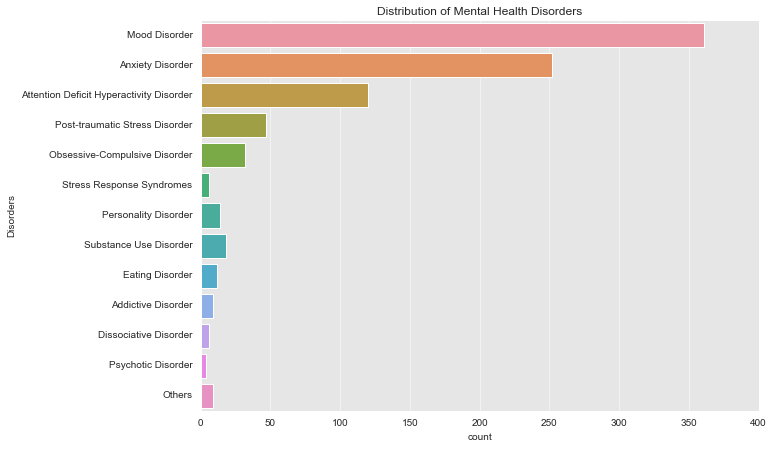

In [112]:
# inspired by OSMI 2016 analysis

disorders = {}

disorderCounts = dict(osmi16['If so, what condition(s) were you diagnosed with?'].value_counts())
for i in disorderCounts:
    # get the disorders separately in case someone answered with more than one disorder
    disorderList = i.split('|')
    for j in disorderList:
        j = j.split(' (')[0]
        disorders[j] = disorders.get(j, 0) + disorderCounts[i]

tmp = pd.DataFrame()
for i in disorders:
    tmp = tmp.append([i] * disorders[i])

tmp[0] = tmp[0].replace([
    'Autism Spectrum Disorder', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
tmp[0] = tmp[0].replace(['Aspergers', 'Asperger Syndrome'], "Asperger's Syndrome")
tmp[0] = tmp[0].replace(['posttraumatic stress disourder'], 'Post-traumatic Stress Disorder')
tmp[0] = tmp[0].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')
tmp[0] = tmp[0].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
tmp[0] = tmp[0].replace(['Depression'], 'Mood Disorder')
tmp[0] = tmp[0].replace([
    'Autism', "Asperger's Syndrome", 'Intimate Disorder',
    'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder',
    'Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')

# print(tmp[0].value_counts())
plt.figure(figsize=(10,7))
g = sns.countplot(y=tmp[0], order=[
    'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
    'Stress Response Syndromes', 'Personality Disorder', 'Substance Use Disorder',
    'Eating Disorder', 'Addictive Disorder', 'Dissociative Disorder', 
    'Psychotic Disorder', 'Others'])
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')
plt.show()

### 1. Gender / Business:

1.1 Proportion of different tech workers genders participation as representation of the sector.

2014:
- 75% are men.
- It´s important to mention the presence of non binary gender workers, taking into account that we´re talking about 2014. 

2016:
- Men stay the same, while women and non binary people gain certain representation.

2019:
- We can appreciate some increase in non binary workers that correspond to the percentage men's descent.

Text(0.5, 1.0, '2019')

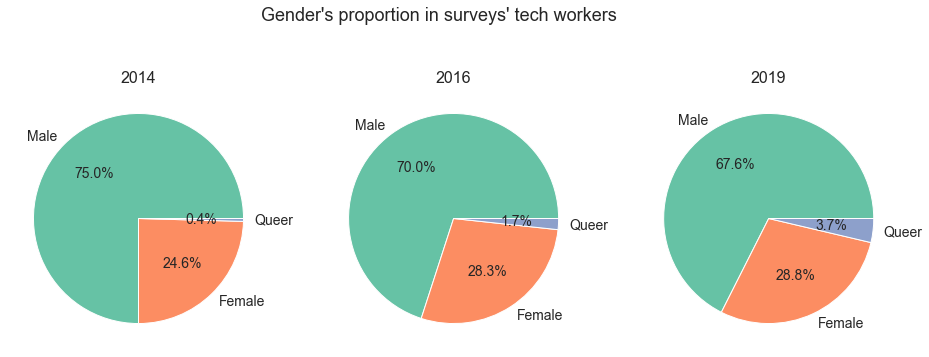

In [113]:
# convert gender column into structured data to plot
def pergender(df, column):
    x = (df[column].value_counts(normalize=True) * 100).to_dict()
    x_df = pd.DataFrame(x.items(), columns=('Gender','Percentage'))
    return x_df

# 2014
pergender14 = pergender(contract14, 'Gender')
# 2016
pergender16 = pergender(contract16, 'What is your gender?')
# 2019
pergender19 = pergender(contract19, 'What is your gender?')

labels = ['Male', 'Female', 'Queer']

# gender's percentage pie
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 11), sharey=True)
fig.suptitle('\n'.join(["Gender's proportion in surveys' tech workers"]), fontsize=18, y=0.78)
fig.subplots_adjust()
plt.rcParams['font.size'] = 14

ax1.pie(pergender14.Percentage, labels=labels, autopct='%1.1f%%')
ax2.pie(pergender16.Percentage, labels=labels, autopct='%1.1f%%')
ax3.pie(pergender19.Percentage, labels=labels, autopct='%1.1f%%')

ax1.set_title('2014', fontsize=16)
ax2.set_title('2016', fontsize=16)
ax3.set_title('2019', fontsize=16)

1.2 Proportion of employees from different companies' size.

2014:
- Medium and big entreprises are almost equal in participation with a 77%.

2016:
- Big entreprises represent almost 50% of tech workers.

2019:
- Pretty similar representation of medium and big entreprises, and small ones descent even more than previous surveys.

Text(0.5, 1.0, '2019')

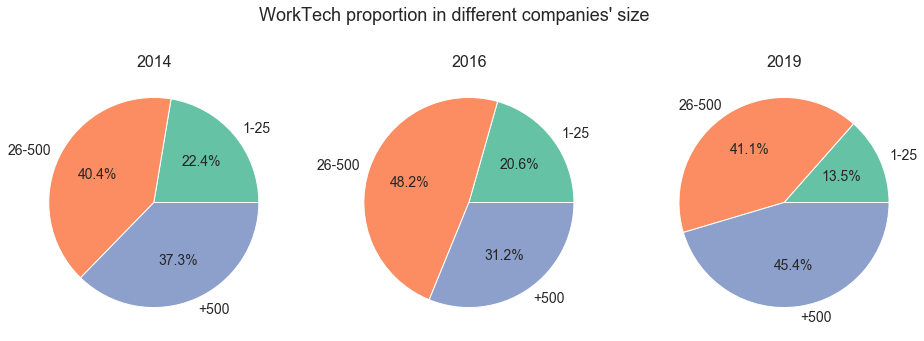

In [114]:
# companies' size per group
def no_employees(df, column):
    label1 = df[column].value_counts()[['1-5', '6-25']].sum()
    label2 = df[column].value_counts()[['26-100', '100-500']].sum()
    label3 = df[column].value_counts()[['500-1000', 'More than 1000']].sum()
    return label1, label2, label3

sizes14 = no_employees(contract14, 'no_employees')
sizes16 = no_employees(contract16, 'How many employees does your company or organization have?')
sizes19 = no_employees(contract19, 'How many employees does your company or organization have?')

labels = ['1-25', '26-500', '+500']

# print pie chart
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 11), sharey=True)
fig.suptitle('\n'.join(["WorkTech proportion in different companies' size"]), fontsize=18, y=0.76)
fig.subplots_adjust()
plt.rcParams['font.size'] = 14

ax1.pie(sizes14, labels=labels, autopct='%1.1f%%')
ax2.pie(sizes16, labels=labels, autopct='%1.1f%%')
ax3.pie(sizes19, labels=labels, autopct='%1.1f%%')

ax1.set_title('2014', fontsize=16)
ax2.set_title('2016', fontsize=16)
ax3.set_title('2019', fontsize=16)

1.3 Gender / Companies' size.

2014:
- Men and women share the same kind of proportion (taking in consideration each participation size).Medium companies win in both groups.
- Non binary workers almost appear for the low numbers of entries but we can see that most of them work in big enterprises.

2016:
- Men work primarily in medium companies, way ahead of the next group (big enterprises).
- In women, first and second group are closer, and it seems that small business trust more in men than women.
- In respect of non binary workers, the representation is more equal in all the groups.

2019:
- Men work mainly in medium an big companies (equitably).
- This year, stands out that for the first time women are more represented in big companies.
- Non binary persons work mainly in big and medium enterprises.

In [115]:
# function to create new column with three companies size 
def company_size(df, column):
    new_col = []
    for x in df[column]:
        if (x == '1-5') or (x == '6-25'):
            new_col.append('SE')
        elif (x == '26-100') or (x == '100-500'):
            new_col.append('ME')
        else:
            new_col.append('BE')
    return new_col


contract14['company'] = company_size(contract14, 'no_employees')
contract16['company'] = company_size(contract16, 'How many employees does your company or organization have?')
contract19['company'] = company_size(contract19, 'How many employees does your company or organization have?')

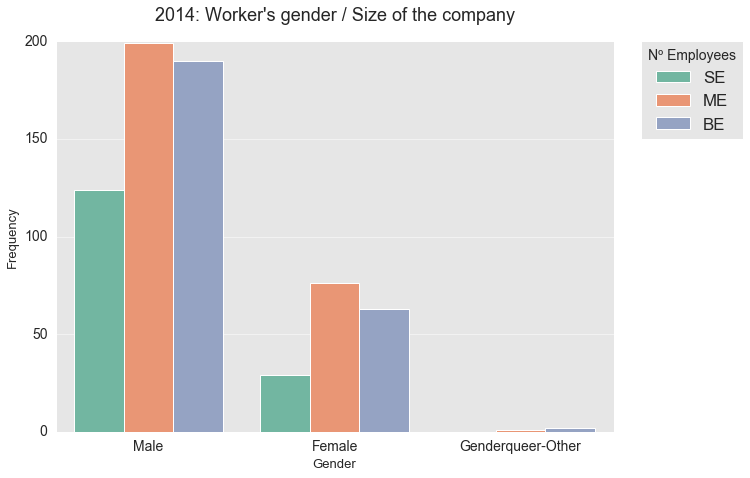

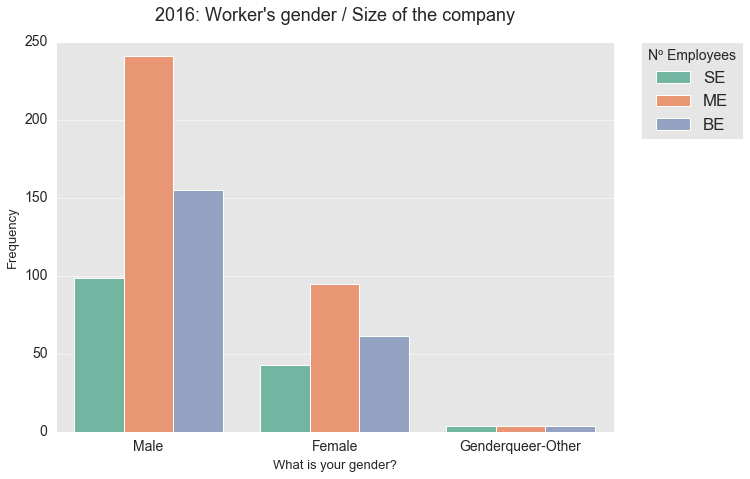

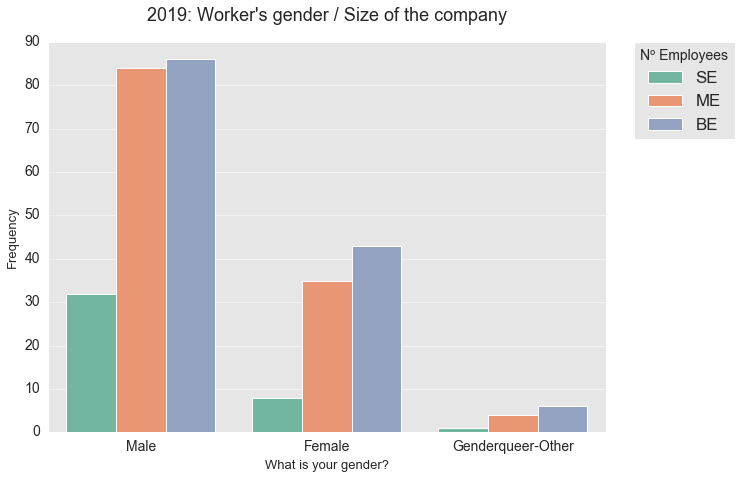

In [116]:
# function to represent companies and gender
def size_gender(df, col, hue_col, title):

    plt.figure(figsize=(10,7))

    g = sns.countplot(col, hue=hue_col, data=df, hue_order=['SE','ME','BE'])
    g.set_xlabel(col, fontsize=13)
    g.set_ylabel('Frequency', fontsize=13)
    g.set_title(title, fontsize=18, y=1.04)

    g.legend_.remove()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Nº Employees')
    plt.show()


# 2014
size_gender(contract14, 'Gender', 'company', "2014: Worker's gender / Size of the company")
# 2016
size_gender(contract16, 'What is your gender?', 'company', "2016: Worker's gender / Size of the company")
# 2019
size_gender(contract19, 'What is your gender?', 'company', "2019: Worker's gender / Size of the company")


1.4 Gender / +500 employees.

2014:
- Almost 3 quarters are men.

2016:
- Not representative changes respect 2014

2019:
- Men percentage descend, but just 36% of persons are women or non binary gender.

Text(0.5, 1.0, '2019')

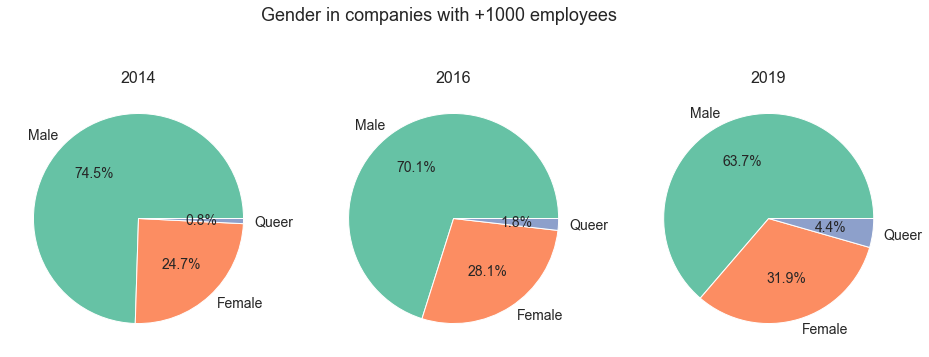

In [117]:
# put together diferent genders in +500 employees enterprices
def gender_BE(df, col_gender, col_busi):
    sizes = [df[(df[col_gender] == 'Male') & (df[col_busi] == 'BE')].shape[0],
        df[(df[col_gender] == 'Female') & (df[col_busi] == 'BE')].shape[0],
        df[(df[col_gender] == 'Genderqueer-Other') & (df[col_busi] == 'BE')].shape[0]
        ]
    return sizes

# 2014
sizes14 = gender_BE(contract14, 'Gender', 'company')
# 2016
sizes16 = gender_BE(contract16, 'What is your gender?', 'company')
# 2019
sizes19 = gender_BE(contract19, 'What is your gender?', 'company')

labels = ['Male', 'Female', 'Queer']

# print pie chart
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 11), sharey=True)
fig.suptitle('\n'.join(['Gender in companies with +1000 employees']), fontsize=18, y=0.78)
fig.subplots_adjust()
plt.rcParams['font.size'] = 14

ax1.pie(sizes14, labels=labels, autopct='%1.1f%%')
ax2.pie(sizes16, labels=labels, autopct='%1.1f%%')
ax3.pie(sizes19, labels=labels, autopct='%1.1f%%')

ax1.set_title('2014', fontsize=16)
ax2.set_title('2016', fontsize=16)
ax3.set_title('2019', fontsize=16)

### 2. Business/employees study:

2.1 Here will see the proportions on the knowledge of the employers about the existence of mental health care in their business wellness program, and if the employers talked them about that or any other resource to assist them in the management of stress or other mental health issues faced.

2014:
- Almost half not even know if their companies have that kind of program.
- On the other hand, the employers don´t speak about mental health in any terms.

2016:
- Increase companies that offer mental health assistance as part of their wellness program.
- The propotion of employers that don´t inform to their employees about any mental health possible assistance maintains.

2019:
- Little increase of companies that don´t have mental health assistance.
- On the other hand we can see also an increase on the group of employers that inform about mental health resources 

In [120]:
# unifying answers
def benefits_answers(df, col_benefits, col_info):
    df[col_benefits].replace("I don't know", "Don't know", inplace=True)
    df[col_info].replace("I don't know", "Don't know", inplace=True)
    df[col_benefits].replace('Not eligible for coverage / NA', "Don't know", inplace=True)
    df[col_info].replace('Not eligible for coverage / NA', "Don't know", inplace=True)
    df[col_benefits].replace("Not eligible for coverage / N/A", "Don't know", inplace=True)
    df[col_info].replace('Not eligible for coverage / N/A', "Don't know", inplace=True)

benefits_answers(contract16, 'Does your employer provide mental health benefits as part of healthcare coverage?', "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?")
benefits_answers(contract19, 'Does your employer provide mental health benefits as part of healthcare coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?')

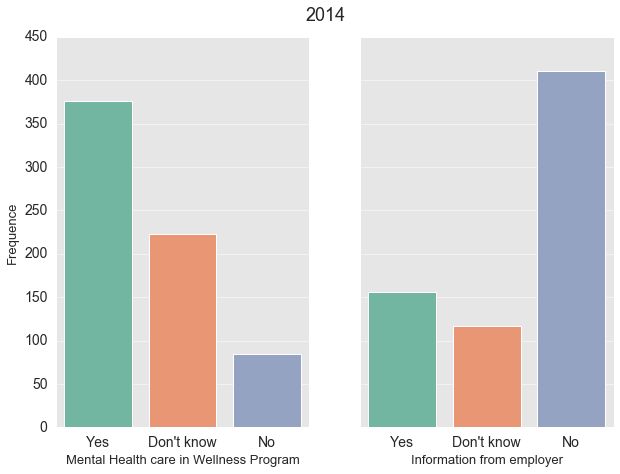

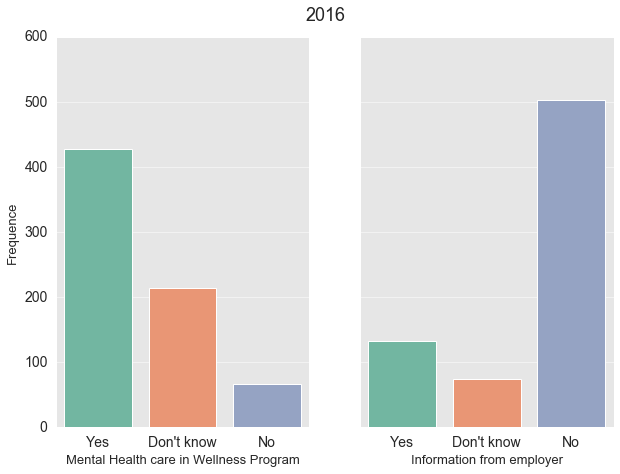

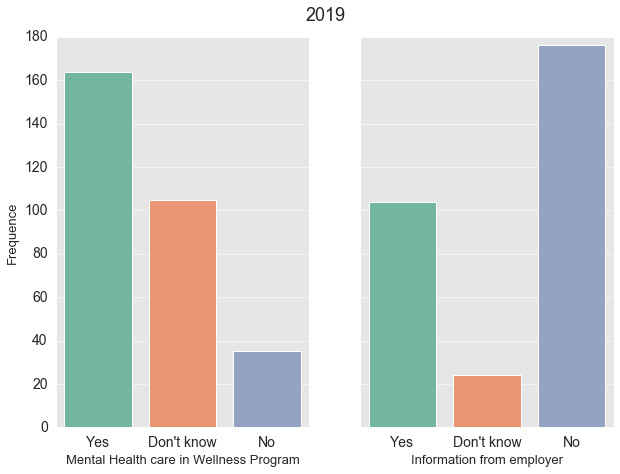

In [121]:
# plot companies' wellness benefits and information about mental health from employers
def wellness(df, col_benefits, col_info, year):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7), sharey=True)
    fig.suptitle('\n'.join([year]), fontsize=18, y=0.96)
    fig.subplots_adjust()

    g1 = sns.countplot(col_benefits, data=df, ax=ax1, order=['Yes', "Don't know", 'No'])
    g2 = sns.countplot(col_info, data=df, ax=ax2, order=['Yes', "Don't know", 'No'])

    g1.set_xlabel('Mental Health care in Wellness Program', fontsize=13)
    g2.set_xlabel('Information from employer', fontsize=13)
    g1.set_ylabel('Frequence', fontsize=13)
    g2.set_ylabel('')


# 2014
wellness(contract14, "benefits", "wellness_program", "2014")
# 2016
wellness(contract16, 'Does your employer provide mental health benefits as part of healthcare coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', "2016")
# 2019
wellness(contract19, 'Does your employer provide mental health benefits as part of healthcare coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', "2019")

2.2 Would you be willing to discuss a mental health issue with your coworkers? And with your supervisor?

2014:
- About coworkers, it´s seems like all genders prefer to trust on the closest to them.
- For the supervisors question, almost the same in all categories and genders. 
- Also we see that men have more willing to talk to the supervisor than coworkers. And genderqueer doubt about both.

2016:
- The percentages are more balanced, descending 'No' answers and increases 'Yes' in both questions.
- Genderqueer workers prefer to talk to the supervisor than coworkers.

2019:
- Men are more willing to talk to a supervisor.
- Women are more willing to talk to coworkers.
- Genderqueer tech workers doubt on booth questions like in 2014, but we can see that they are less willing to talk to a supervisor than in 2016 survey.

In [122]:
contract16['Would you feel comfortable discussing a mental health disorder with your coworkers?'].value_counts()

Maybe    303
No       240
Yes      166
Name: Would you feel comfortable discussing a mental health disorder with your coworkers?, dtype: int64

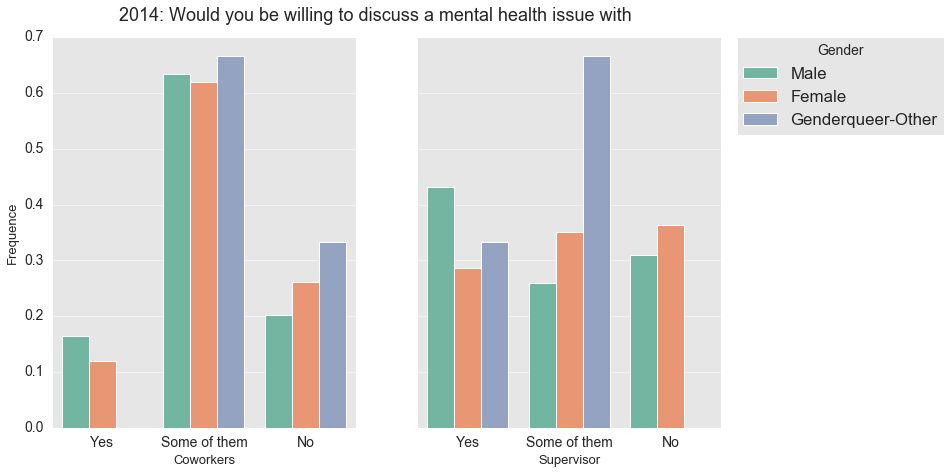

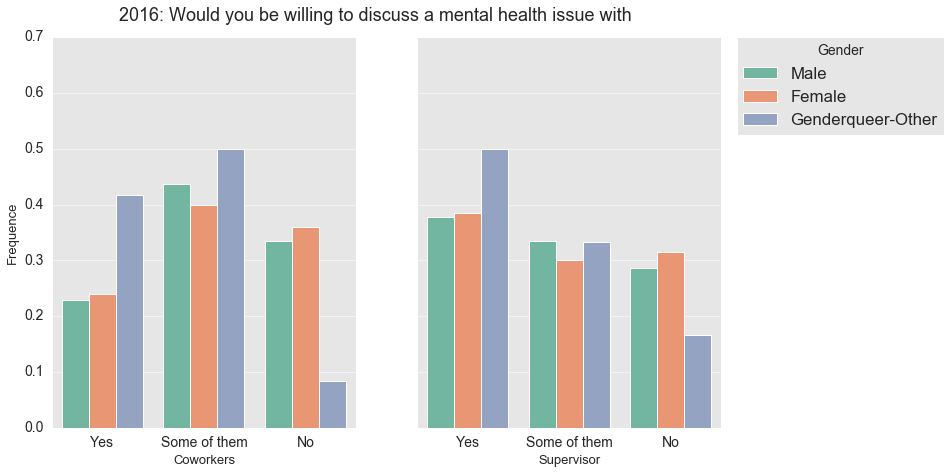

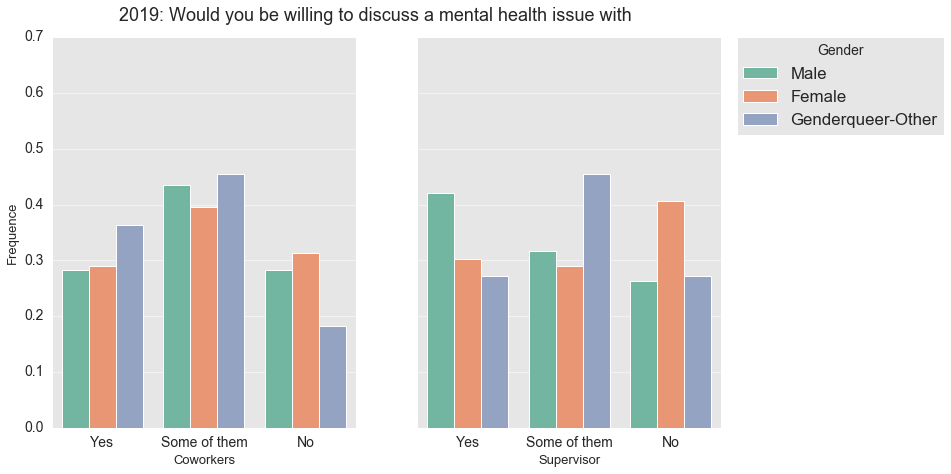

In [123]:
# plot the relation between confidence of the techworkers to talk to coworkers and supervisor, per gender
def confidence(df, col_co, col_sup, col_gender, title):

    df[col_co].replace("Maybe", 'Some of them', inplace=True)
    df[col_sup].replace("Maybe", 'Some of them', inplace=True)

    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 7) ,sharey=True)
    fig.suptitle('\n'.join([title]), fontsize=18, y=0.96)

    pergenderco = (df[col_co]
           .groupby(df[col_gender])
           .value_counts(normalize=True)
           .rename('Proportion')
           .reset_index())
    pergendersu = (df[col_sup]
           .groupby(df[col_gender])
           .value_counts(normalize=True)
           .rename('Proportion')
           .reset_index())


    g1 = sns.barplot(x=col_co, y='Proportion', hue=col_gender, hue_order=['Male', 'Female', 'Genderqueer-Other'], data=pergenderco, ax=ax1,    order=['Yes', 'Some of them', 'No'])
    g2 = sns.barplot(x=col_sup, y='Proportion', hue=col_gender, hue_order=['Male', 'Female', 'Genderqueer-Other'], data=pergendersu, ax=ax2,   order=['Yes', 'Some of them', 'No'])

    g1.set_xlabel('Coworkers', fontsize=13)
    g2.set_xlabel('Supervisor', fontsize=13)
    g1.set_ylabel('Frequence', fontsize=13)
    g2.set_ylabel('')
    g1.set(ylim = (0,0.7))
    g2.set(ylim = (0,0.7))


    g1.legend_.remove()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')

    plt.show()

# 2014
confidence(contract14, 'coworkers', 'supervisor', 'Gender', '2014: Would you be willing to discuss a mental health issue with')
# 2016
confidence(contract16, 'Would you feel comfortable discussing a mental health disorder with your coworkers?', 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?', 'What is your gender?', '2016: Would you be willing to discuss a mental health issue with')
#2019
confidence(contract19, 'Would you feel comfortable discussing a mental health issue with your coworkers?', 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?', 'What is your gender?', '2019: Would you be willing to discuss a mental health issue with')


2.3 Possible consequences of discuss mental health / physical health issue with your employer?

2014:
- Tech workers think that it's so much safer for their possible future job position, to have a physical than mental issue.

2016:
- Not representative changes.

2019:
- Not representation.

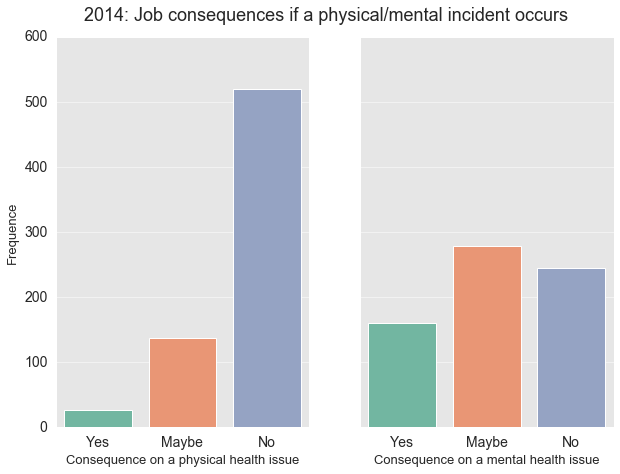

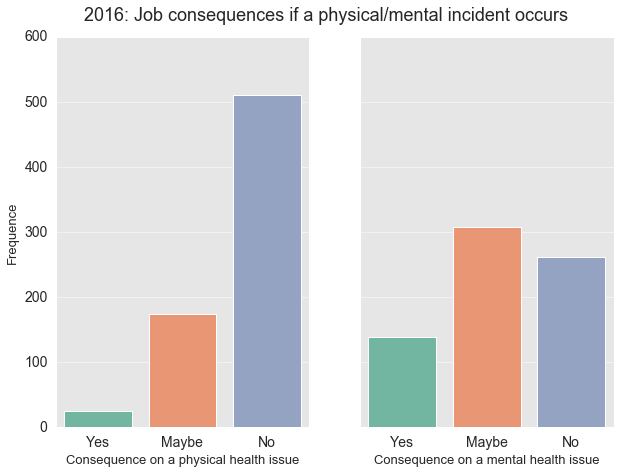

In [124]:
# check consequences of discuss mental vs physical health
def physical_mental(df, col_phys, col_mental, title):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7), sharey=True)
    fig.subplots_adjust()
    fig.suptitle('\n'.join([title]), fontsize=18, y=0.96)

    g1 = sns.countplot(col_phys, data=df, ax=ax1, order=['Yes', 'Maybe', 'No'])
    g2 = sns.countplot(col_mental, data=df, ax=ax2, order=['Yes', 'Maybe', 'No'])

    g1.set_xlabel('Consequence on a physical health issue', fontsize=13)
    g2.set_xlabel('Consequence on a mental health issue', fontsize=13)
    g1.set_ylabel('Frequence', fontsize=13)
    g2.set_ylabel('')

    plt.show()


#2014
physical_mental(contract14, "phys_health_consequence", "mental_health_consequence", '2014: Job consequences if a physical/mental incident occurs')
#2016
physical_mental(contract16, 'Do you think that discussing a physical health issue with your employer would have negative consequences?', 'Do you think that discussing a mental health disorder with your employer would have negative consequences?', '2016: Job consequences if a physical/mental incident occurs')
#2019: Not representation

2.4 Bring up a mental health issue vs a physical health issue in a job interview? 

2014:
- In the physical health question, the doubt and negative answer are almost equal, and not much people would bring up something like that in a job interview.
- About mental health almost all the surveyed workers answer that they wouldn't do it. Just a few of them has doubts about it.

2016:
- Slightly increases trust about both questions respect the previous survey.

2019:
- Not representative changes.

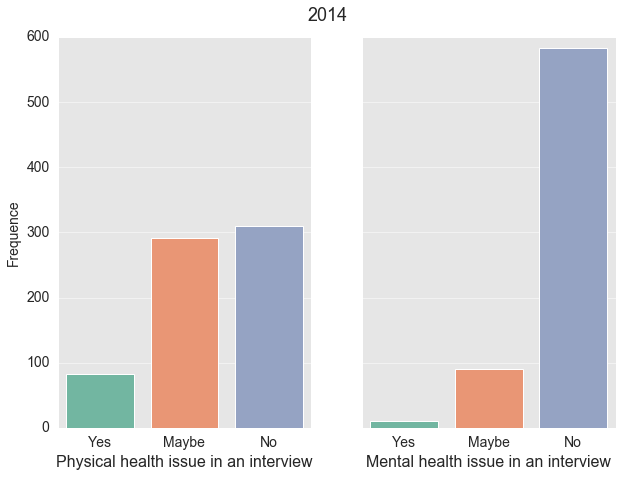

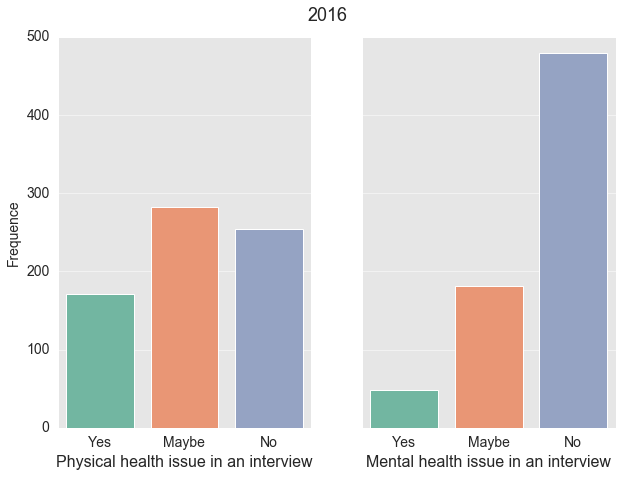

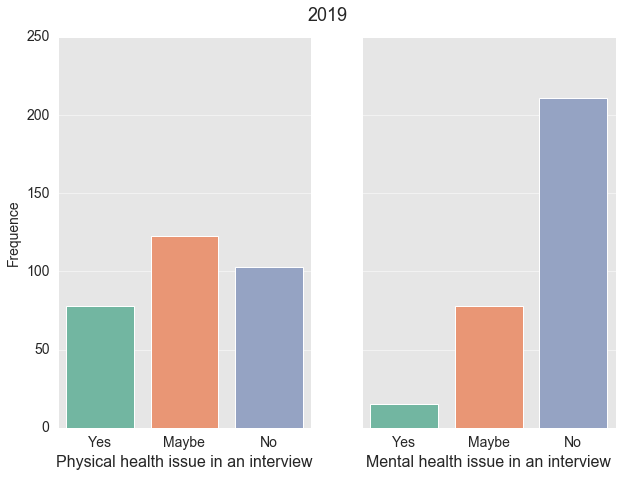

In [125]:
# plot physical vs mental health issue in an interview
def interview(df, col_phys, col_mental, title):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7), sharey=True)
    fig.subplots_adjust()
    fig.suptitle('\n'.join([title]), fontsize=18, y=0.96)

    g1 = sns.countplot(col_phys, data=df, ax=ax1, order=['Yes', 'Maybe', 'No'])
    g2 = sns.countplot(col_mental, data=df, ax=ax2, order=['Yes', 'Maybe', 'No'])

    g1.set_xlabel('Physical health issue in an interview', fontsize=16, y=1.02)
    g2.set_xlabel('Mental health issue in an interview', fontsize=16, y=1.02)
    g1.set_ylabel('Frequence')
    g2.set_ylabel('')

    plt.show()

#2014
interview(contract14, "phys_health_interview", "mental_health_interview", '2014')
#2016
interview(contract16, 'Would you be willing to bring up a physical health issue with a potential employer in an interview?', 'Would you bring up a mental health issue with a potential employer in an interview?', '2016')
#2019
interview(contract19, 'Would you be willing to bring up a physical health issue with a potential employer in an interview?', 'Would you bring up your *mental* health with a potential employer in an interview?', '2019')

### 3. Mental health:

3.1 Gender/treatment.

2014:
- In male and not binary people, distribution is fairly balanced.
- In female distribution, more than double of women that doesn't sought treatment, have done it.

2016:
- More men than in 2014 survey have sought for treatment.
- Women stay the same.
- 100% of genderqueer workers in thar survey have sought for treatment.

2019:
- Distributed proportion with more 'Yes' in all genders. 
- Still more women and genderqueer workers than men in 'Yes' column.

In [126]:
# new column to unify answers
def treat_answer(df, col_treatment):
    treatment = []
    for x in df[col_treatment]:
        if (x == 0) or (x == False):
            treatment.append('No')
        elif (x == 1) or (x == True):
            treatment.append('Yes')
    return treatment


contract16['treatment'] = treat_answer(contract16, 'Have you ever sought treatment for a mental health issue from a mental health professional?')
contract19['treatment'] = treat_answer(contract19, 'Have you ever sought treatment for a mental health disorder from a mental health professional?')

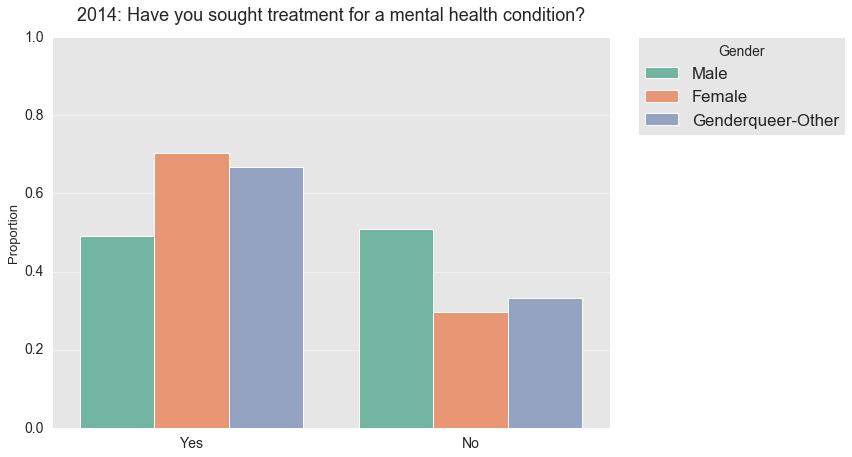

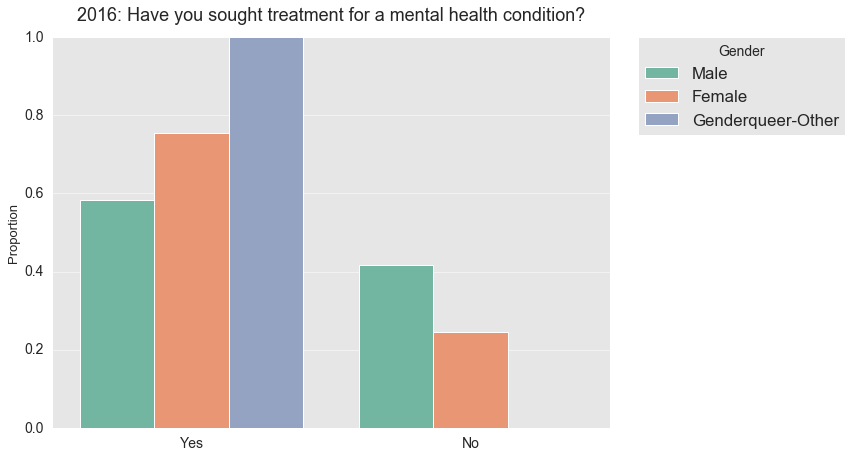

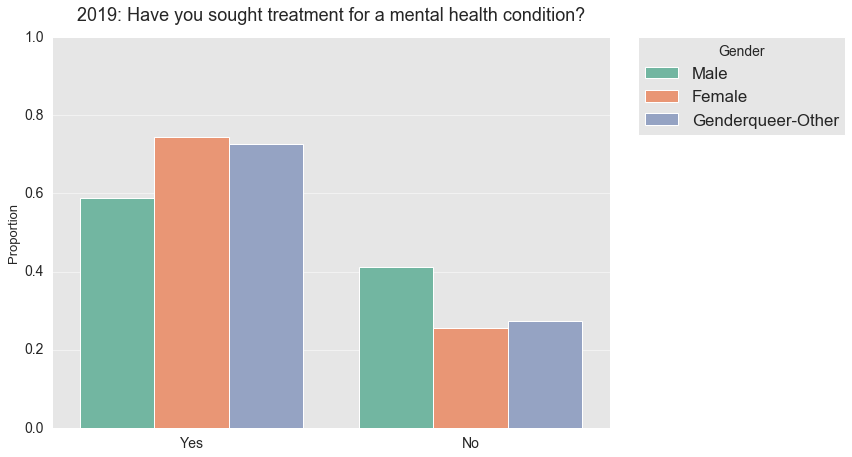

In [127]:
# plot the correlation between people who have sought for treatment and their gender
def treatment_gender(df, col_treatment, col_gender, title):
    plt.figure(figsize=(10,7))

    pertreat = (df[col_treatment]
           .groupby(df[col_gender])
           .value_counts(normalize=True)
           .rename('Proportion')
           .reset_index())

    g = sns.barplot(x=col_treatment, y='Proportion', hue=col_gender, data=pertreat,order=['Yes', 'No'], hue_order=['Male', 'Female', 'Genderqueer-Other'])

    g.set_xlabel('', fontsize=13)
    g.set_ylabel('Proportion', fontsize=13)
    g.set_title(title, fontsize=18, y=1.03)
    g.set(ylim = (0,1.0))

    g.legend_.remove()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')


#2014
treatment_gender(contract14, 'treatment', 'Gender', '2014: Have you sought treatment for a mental health condition?')
#2016
treatment_gender(contract16, 'treatment', 'What is your gender?', '2016: Have you sought treatment for a mental health condition?')
#2019
treatment_gender(contract19, 'treatment', 'What is your gender?', '2019: Have you sought treatment for a mental health condition?')

3.2 Family history / Treatment.

2014:
- We can see a direct correlation between a mental health family history and have sought for a mental issue treatment.

2016:
- Not representative changes.

2019:
- Not representative changes.

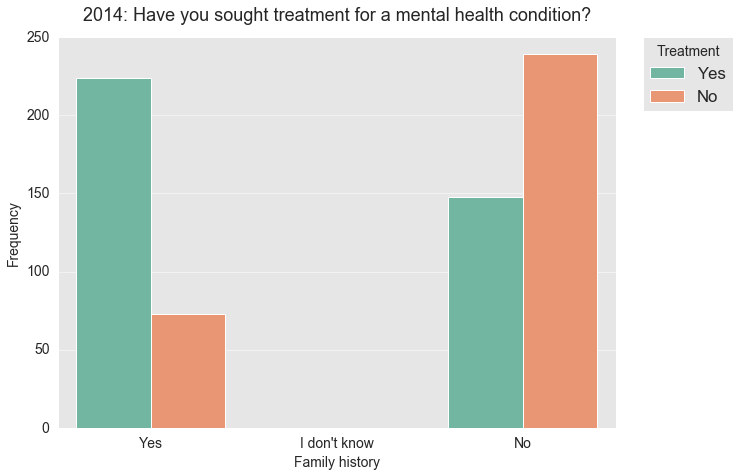

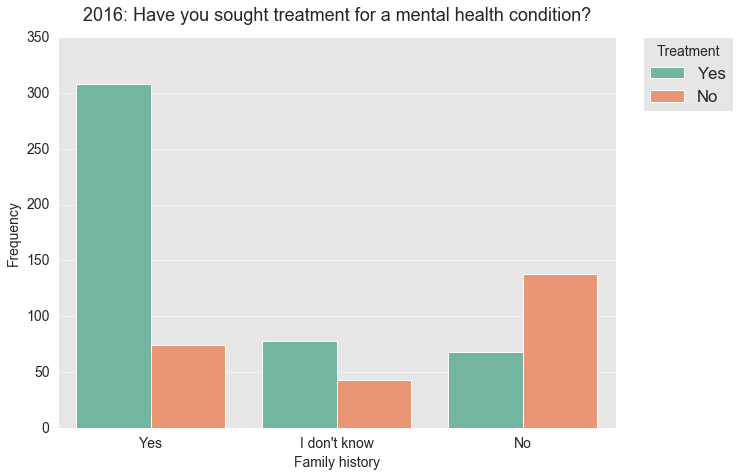

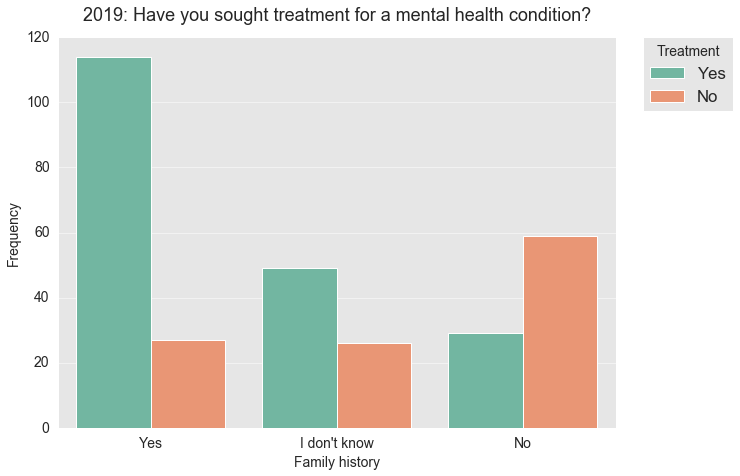

In [129]:
# study the correlation between have family mental history and have sought for treatment
def history(df, col_history, col_treatment, title):
    plt.figure(figsize=(10,7))
    g = sns.countplot(x=col_history,  
                  hue=col_treatment, data=df, order=['Yes', "I don't know", 'No'], hue_order=['Yes', 'No'])

    g.set_xlabel('Family history')
    g.set_ylabel('Frequency')
    g.set_title(title, fontsize=18, y=1.03)

    g.legend_.remove()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Treatment')

    plt.show()

#2014 have no 'I don't know' option
history(contract14, 'family_history', 'treatment', '2014: Have you sought treatment for a mental health condition?')
#2016
history(contract16, 'Do you have a family history of mental illness?', 'treatment', '2016: Have you sought treatment for a mental health condition?')
#2019
history(contract19, 'Do you have a family history of mental illness?', 'treatment', '2019: Have you sought treatment for a mental health condition?')
